In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the file
data=pd.read_csv('../data/Dataset_ecommerce.csv')

In [3]:
#call 5 data to view the file
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
#check for missing data
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
#drop row with missing data
data.dropna(inplace=True)

In [6]:
#check again for mising data
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [7]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [8]:
from datetime import datetime as dt

def get_month(x):
    return dt(x.year, x.month, 1)


data['InvoiceDate']= data['InvoiceDate'].apply(get_month)

data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [9]:
#create a new column
data['Total_price']=data['Quantity'] * data['UnitPrice']

In [10]:
#check if total_price has been added to the dataframe
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


# ANALYSIS SHOWING DIFFERNT COUNTRY WITH TOTAL AMOUNT OF GOODS BOUGHT

In [11]:
price = data.groupby(['Country'])['Total_price'].sum().reset_index()
price= price.sort_values(['Total_price'], ascending=False)

In [12]:
#top 10 countries with highest amount bought
top10=price.head(10)
top10

,Country,Total_price
9,Libya,37690362.35
19,Somalia,37663830.57
23,Togo,37592496.96
11,Mali,37508467.02
7,Ghana,37414593.40
15,Nigeria,37364243.60
6,Ethiopia,37228695.13
13,Mozambique,37145464.36
18,Sierra Leone,37140824.43
0,Algeria,37140683.52


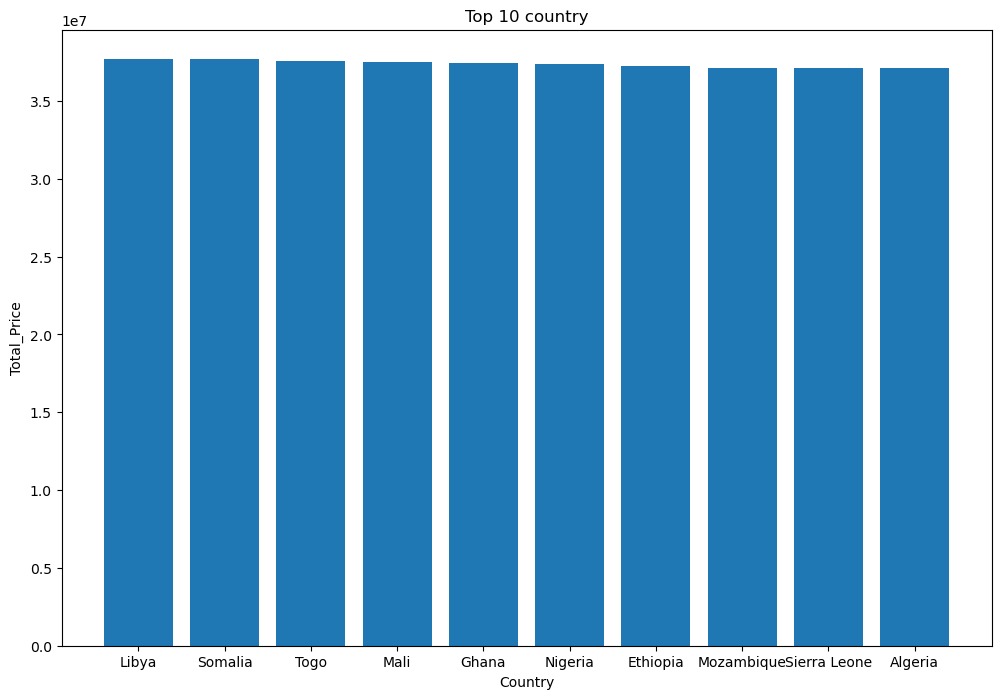

In [13]:
plt.figure(figsize=(12,8))
plt.bar(data=top10, x='Country', height='Total_price')
plt.title('Top 10 country')
plt.xlabel('Country')
plt.ylabel('Total_Price')
plt.show()

In [14]:
#Last 10 countries with lowest amount bought
last10=price.tail(10)
last10

,Country,Total_price
1,Benin,36921841.33
16,Rwanda,36864615.30
24,Tunisia,36837574.80
22,Tanzania,36820360.73
14,Niger,36808276.74
2,Burkina Faso,36671763.77
5,Egypt,36619734.48
25,Uganda,36598727.25
10,Madagascar,36524344.59
26,Zambia,36253058.16


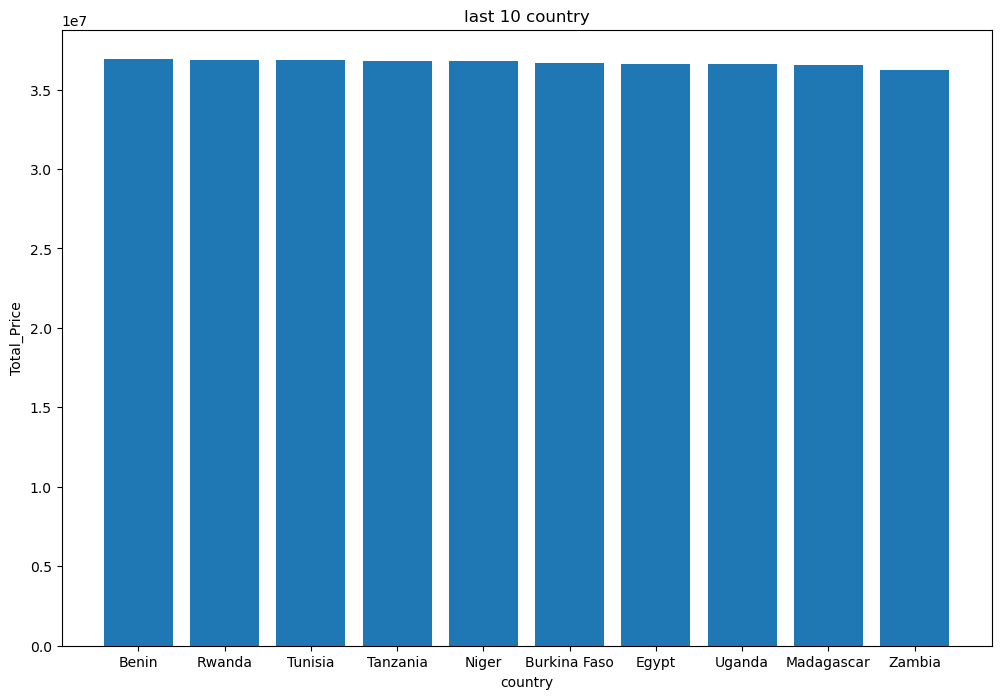

In [15]:
plt.figure(figsize=(12,8))
plt.bar(data=last10, x='Country', height='Total_price')
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('Total_Price')
plt.show()

# COUNTRY WITH RESPECT TO NUMBER OF CUSTOMER FROM THEM

In [16]:
customer = data.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer= customer.sort_values(['CustomerID'], ascending=False)

In [17]:
#top 10 countries with highest NUMBER of customer
customer.head(10)

,Country,CustomerID
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049
18,Sierra Leone,3046
11,Mali,3044
0,Algeria,3043
17,Senegal,3040
14,Niger,3039


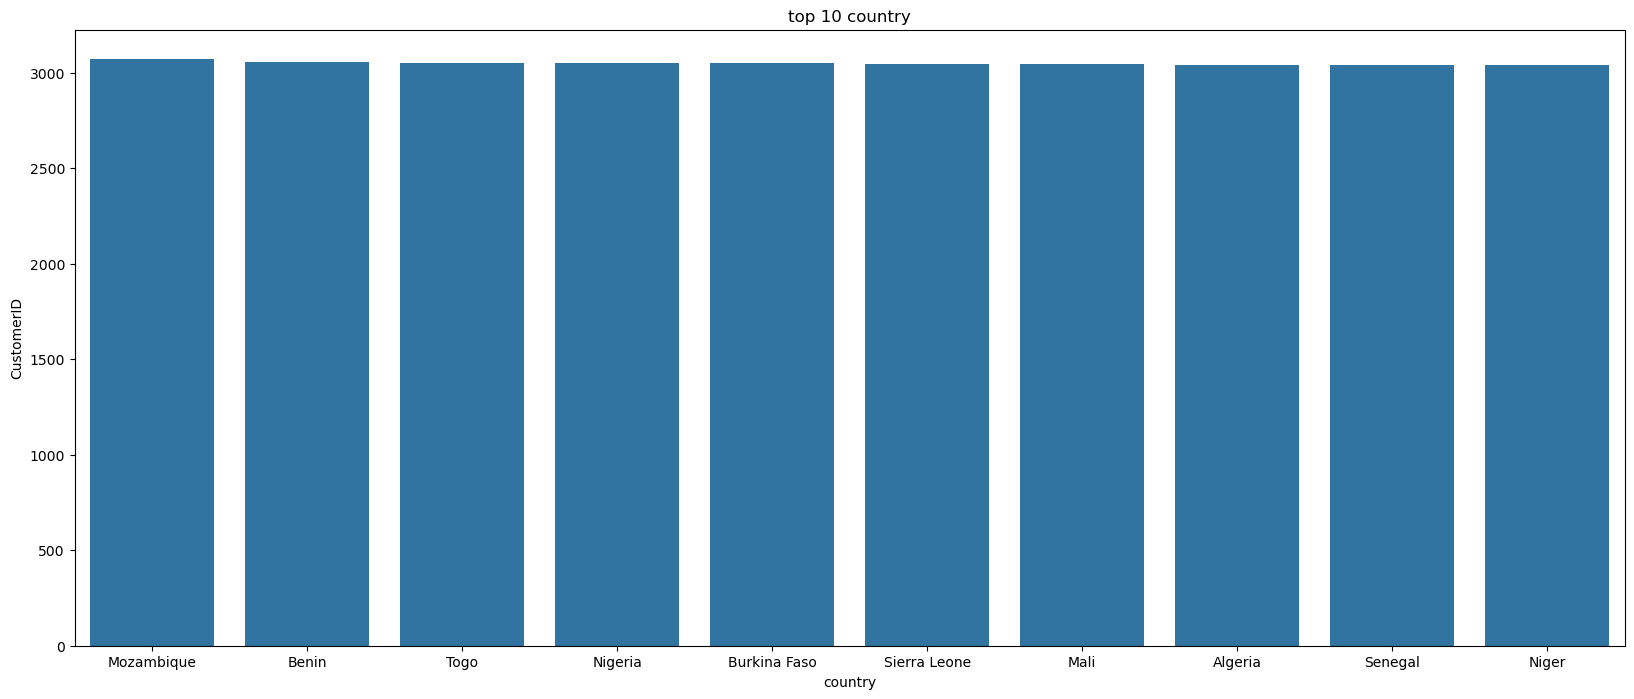

In [18]:
#top 10 countries with highest NUMBER of customer
Ctop10=customer.head(10)
plt.figure(figsize=(20,8))
sns.barplot( x = 'Country', y = 'CustomerID', data=Ctop10)
plt.title('top 10 country')
plt.xlabel('country')
plt.ylabel('CustomerID')
plt.show()

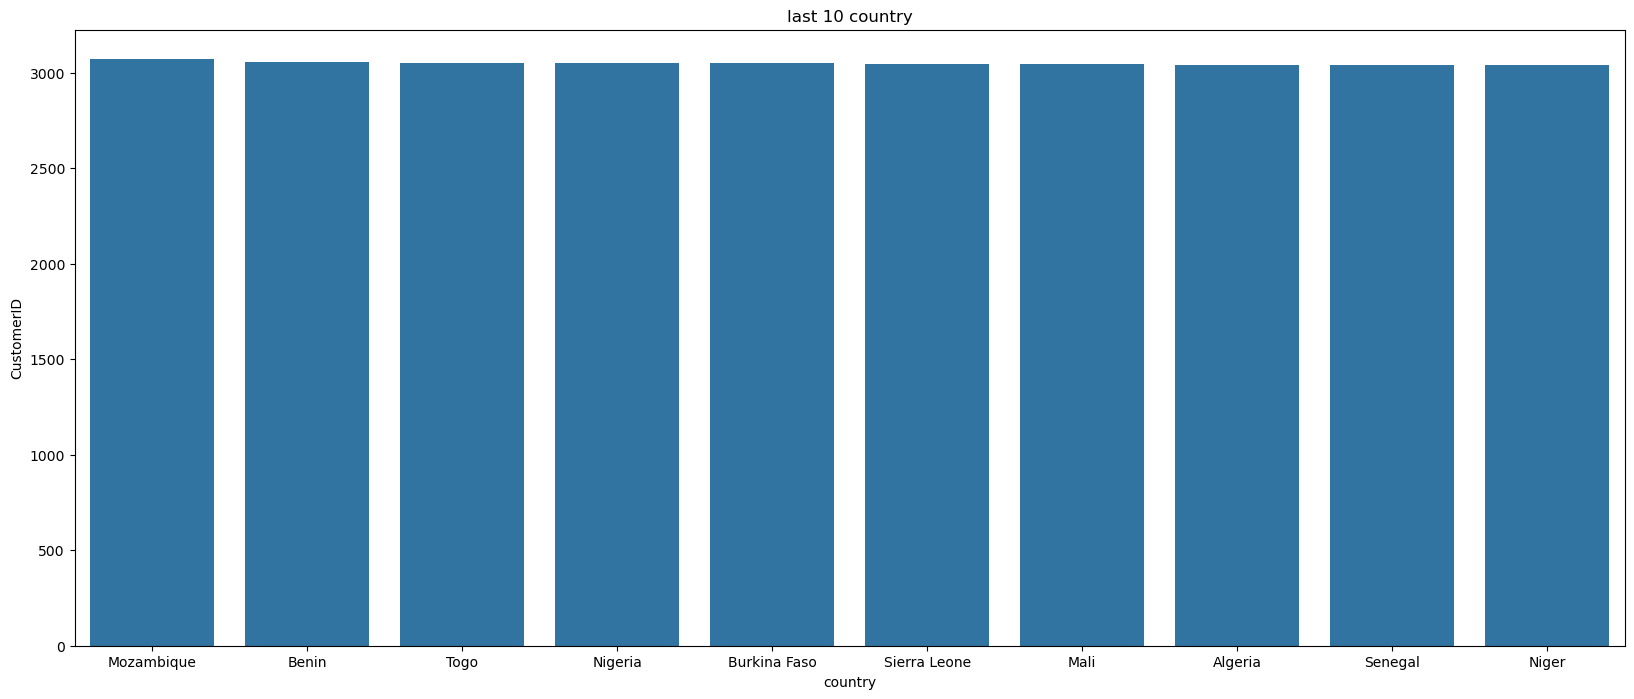

In [19]:
#last countries with lowest NUMBER of customer
Clast10=customer.tail(10)
plt.figure(figsize=(20,8))
sns.barplot( x = 'Country', y = 'CustomerID', data=Ctop10)
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('CustomerID')
plt.show()

# DIFFERNT GOODS BOUGHT IN RESPECT TO COUNTRY

In [20]:
country_des = data.pivot_table(index='Country',
                                 columns='Description',
                                 aggfunc='size',
                                 fill_value=0)

country_des.head(5)

Description,Books,Cloths,Cosmetics,Electronics,Furniture,Jewelry,Kitchenware,Shoes,Sports Equipment,Toys
Country,,,,,,,,,,
Algeria,1422,1468,1452,1432,1401,1464,1410,1512,1482,1449
Benin,1456,1476,1423,1459,1423,1502,1516,1409,1503,1443
Burkina Faso,1428,1412,1448,1470,1465,1408,1512,1451,1408,1411
Cameroon,1452,1442,1529,1378,1483,1488,1432,1464,1459,1492
Cote d'Ivoire,1468,1509,1483,1456,1482,1459,1401,1419,1492,1476


In [21]:
most_desc= data['Description'].value_counts()

In [22]:
most_desc.head()

Description
Jewelry             41017
Sports Equipment    40983
Toys                40829
Furniture           40770
Shoes               40769
Name: count, dtype: int64

# customers frequency

In [29]:
#calculate the customers frequency
most_freqent_customer = data['CustomerID'].value_counts().reset_index()

# Renaming the 'count' column to 'frequency'
most_freqent_customer = most_freqent_customer.rename(columns={'count': 'Frequency'})

most_freqent_customer = most_freqent_customer.sort_values(['Frequency'], ascending=False)
most_freqent_customer

,CustomerID,Frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
...,...,...
4316,14705.0,1
4315,14679.0,1
4314,15316.0,1
4313,18233.0,1


In [24]:
# top 10 loyal
frequency_10 = most_freqent_customer.head(10)
frequency_10

,CustomerID,Frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


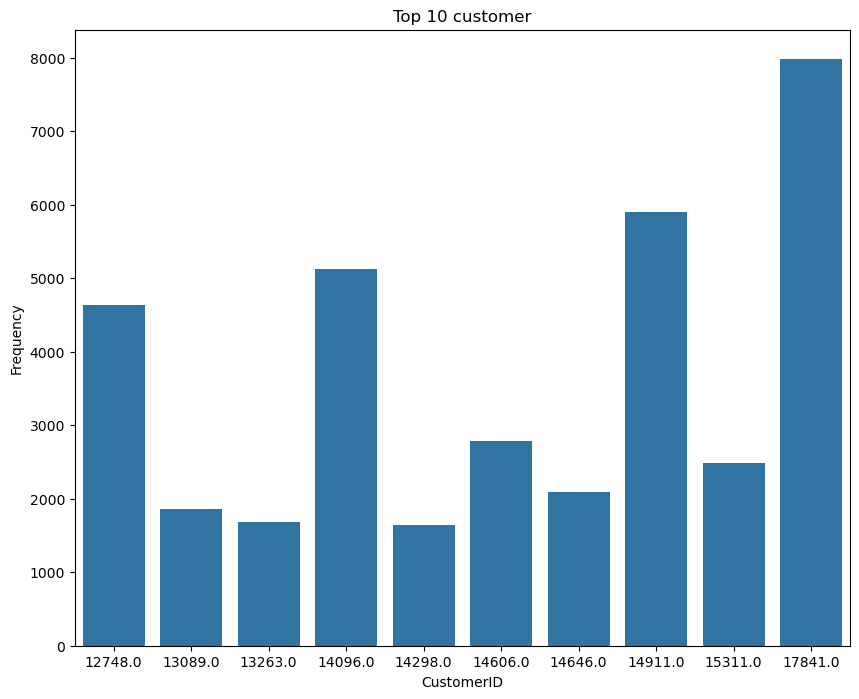

In [25]:

plt.figure(figsize=(10,8))
sns.barplot( x ='CustomerID', y= 'Frequency', data=frequency_10 )
plt.title('Top 10 customer')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()